Farina Fayyaz  
29 January 2019
# Overview
*Performing Statistical Analysis on the ToothGrowth Dataset*<div style="text-align: justify;">
    This notebook delves into the ToothGrowth dataset, examining tooth growth variations across different factors. We'll start by exploring the data basics, uncovering its central tendencies and distributions. Then, we'll compare tooth growth between subjects receiving orange juice supplements and those with none, relying on statistical tests to assess if the difference is meaningful. Finally, we'll zoom in on the two dosage groups within the orange juice category, employing more advanced techniques to reveal whether their tooth growth significantly differs. Throughout the analysis, we'll carefully interpret confidence intervals and p-values to draw reliable conclusions, while also acknowledging the underlying assumptions necessary for our statistical inferences. Buckle up, as we embark on a journey to unravel the secrets hidden within the ToothGrowth data!</div>

ions.

In [13]:
# loading requierd libraries
library (datasets)
library (ggplot2)
library (gridExtra)
# loading the dataset and creating necessary variables
data(ToothGrowth)
tg <- ToothGrowth 
tg$dose <- as.factor(tg$dose) #This is a factor variable

## Summary of the Dataset
We'll leverage both summary statistics like means and medians to reveal central tendencies within the data, along with standard deviations to understand its spread. Additionally, we'll utilize visualizations like boxplots and histograms to uncover the distribution patterns of key variables like "len" and "dose."

'data.frame':	60 obs. of  3 variables:
 $ len : num  4.2 11.5 7.3 5.8 6.4 10 11.2 11.2 5.2 7 ...
 $ supp: Factor w/ 2 levels "OJ","VC": 2 2 2 2 2 2 2 2 2 2 ...
 $ dose: Factor w/ 3 levels "0.5","1","2": 1 1 1 1 1 1 1 1 1 1 ...


      len        supp     dose   
 Min.   : 4.20   OJ:30   0.5:20  
 1st Qu.:13.07   VC:30   1  :20  
 Median :19.25           2  :20  
 Mean   :18.81                   
 3rd Qu.:25.27                   
 Max.   :33.90                   

len,supp,dose
4.2,VC,0.5
11.5,VC,0.5
7.3,VC,0.5
5.8,VC,0.5
6.4,VC,0.5
10.0,VC,0.5


    
     0.5  1  2
  OJ  10 10 10
  VC  10 10 10

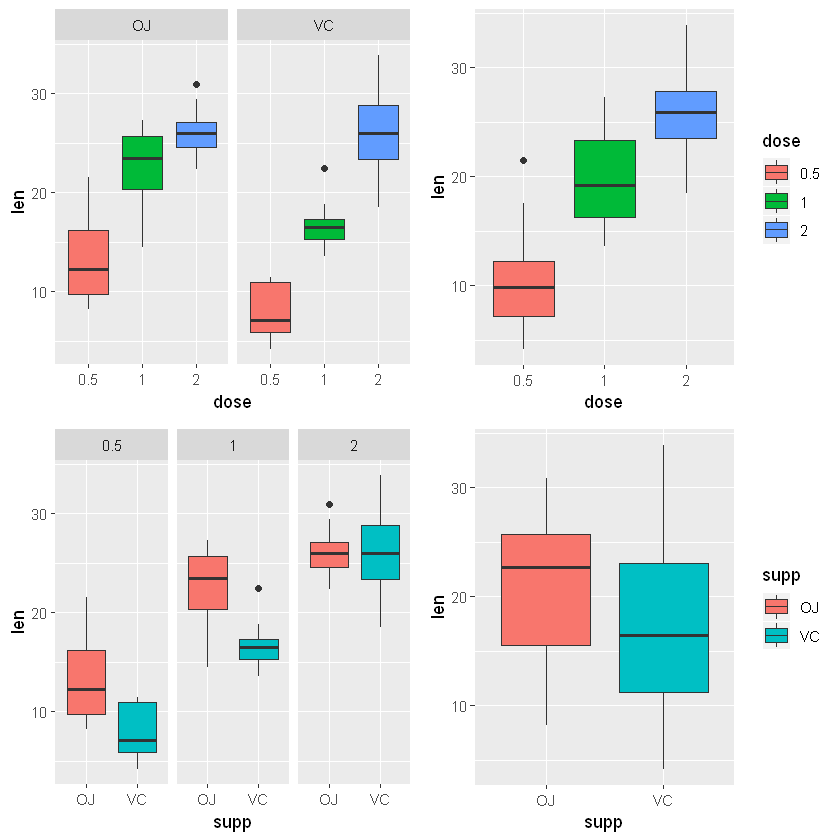

In [14]:
str(tg)
summary(tg)
head(tg)
table(tg$supp, tg$dose)
p1 <- ggplot(data=tg, aes(x=dose,y=len,fill=dose)) +
  geom_boxplot() + 
  theme(legend.position="none") + 
  facet_grid(.~supp) 

p2 <- ggplot(data=tg, aes(x=supp,y=len,fill=supp)) +
  geom_boxplot() + 
  theme(legend.position="none") + 
  facet_grid(.~dose) 

p3 <- ggplot(data=tg, aes(x=supp,y=len,fill=supp)) +
  geom_boxplot()

p4 <- ggplot(data=tg, aes(x=dose,y=len,fill=dose)) +
  geom_boxplot()

grid.arrange(p1, p4, p2, p3, ncol = 2, nrow=2)

## ANOVA 
To explore the combined effects of orange juice supplementation and dosage on tooth growth, we'll perform an ANOVA, testing for main effects and potential interactions.
Before diving into the ANOVA, let's recap the data: orange juice appears to positively affect tooth growth compared to VC, and higher dosages seem to contribute more in either group. The ANOVA will confirm these trends and unveil potential nuances in their interplay.

In [15]:
anova.out <- aov(len ~ supp * dose, data=tg)
summary(anova.out)

            Df Sum Sq Mean Sq F value   Pr(>F)    
supp         1  205.4   205.4  15.572 0.000231 ***
dose         2 2426.4  1213.2  92.000  < 2e-16 ***
supp:dose    2  108.3    54.2   4.107 0.021860 *  
Residuals   54  712.1    13.2                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Both supplement type (p < 0.01) and dosage (p < 0.01) significantly influenced tooth growth, and their combined effect was also statistically relevant (p < 0.05). This suggests a complex interplay between the two factors. 
We can also use **TukeyHSD** which is a post-hoc test that checks which specific groups within a larger analysis, like your 'supp' and 'dose' groups, are actually significantly different from each other.


In [16]:
TukeyHSD(anova.out)


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = len ~ supp * dose, data = tg)

$supp
      diff       lwr       upr     p adj
VC-OJ -3.7 -5.579828 -1.820172 0.0002312

$dose
        diff       lwr       upr   p adj
1-0.5  9.130  6.362488 11.897512 0.0e+00
2-0.5 15.495 12.727488 18.262512 0.0e+00
2-1    6.365  3.597488  9.132512 2.7e-06

$`supp:dose`
               diff        lwr        upr     p adj
VC:0.5-OJ:0.5 -5.25 -10.048124 -0.4518762 0.0242521
OJ:1-OJ:0.5    9.47   4.671876 14.2681238 0.0000046
VC:1-OJ:0.5    3.54  -1.258124  8.3381238 0.2640208
OJ:2-OJ:0.5   12.83   8.031876 17.6281238 0.0000000
VC:2-OJ:0.5   12.91   8.111876 17.7081238 0.0000000
OJ:1-VC:0.5   14.72   9.921876 19.5181238 0.0000000
VC:1-VC:0.5    8.79   3.991876 13.5881238 0.0000210
OJ:2-VC:0.5   18.08  13.281876 22.8781238 0.0000000
VC:2-VC:0.5   18.16  13.361876 22.9581238 0.0000000
VC:1-OJ:1     -5.93 -10.728124 -1.1318762 0.0073930
OJ:2-OJ:1      3.36  -1.43812

The detailed analysis through Tukey HSD unveiled a complex picture of tooth growth variations. Notably, significant differences were observed across nearly all groups defined by supplement type and dosage, suggesting independent and combined effects of these factors. However, a handful of comparisons, including VC at low dosages across supplement types and comparisons within the orange juice group at higher dosages, revealed no statistically significant distinctions, hinting at potential nuances and non-linear relationships in the data.

In [17]:
print(model.tables(anova.out,"means"),digits=3)

Tables of means
Grand mean
         
18.81333 

 supp 
supp
   OJ    VC 
20.66 16.96 

 dose 
dose
  0.5     1     2 
10.60 19.73 26.10 

 supp:dose 
    dose
supp 0.5   1     2    
  OJ 13.23 22.70 26.06
  VC  7.98 16.77 26.14


# Conclusion
**Guinea pig tooth growth analysis**:

* Both supplement type (OJ vs. VC) and dosage (0.5, 1, 2) independently influenced tooth length, with higher dosages generally leading to longer teeth.
* Orange juice (OJ) significantly promoted greater average tooth growth compared to vitamin C (VC) at dosages 0.5 and 1, but not at dosage 2.

**Assumptions**:

The results are reliable if the guinea pigs represent the broader population, dosage and supplement were randomly assigned, and the distribution of means is normal.